In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    #importing all library
import seaborn as sns
import sklearn

import warnings                     # use to ignore warning
warnings.filterwarnings("ignore")


In [2]:
training=pd.read_csv('H2HBABBA2641.csv')

In [3]:
training.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200915438,GROC us,2019-07-10 00:00:00,2019.0,1.929521e+09,2019-06-25,20190620,20190625,20190710.0,USD,RV,1.0,NaN,1064.16,20190625.0,NAA8,1.929521e+09,0
1,U001,0200571849,US trust,2019-11-25 00:00:00,2019.0,1.930046e+09,2019-10-22,20191023,20191022,20191123.0,USD,RV,1.0,NaN,24303.44,20191022.0,NA32,1.930046e+09,0
2,U001,0200705742,DOT foundation,2019-02-04 00:00:00,2019.0,1.928651e+09,2019-01-20,20190120,20190120,20190204.0,USD,RV,1.0,NaN,2119.07,20190120.0,NAA8,1.928651e+09,0
3,U001,0200769623,WAL-MAR,NaN,2020.0,1.930701e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,NaN,36330.27,20200325.0,NAH4,1.930701e+09,1
4,U001,0200331749,SYSC us,2019-08-13 00:00:00,2019.0,1.929600e+09,2019-07-09,20190709,20190709,20190810.0,USD,RV,1.0,NaN,1168.21,20190709.0,NA32,1.929600e+09,0


In [4]:
training.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

In [5]:
training.shape

(50000, 19)

In [6]:
training.drop('area_business',axis=1,inplace=True)   # droping area_business because it has null values

In [7]:
training_1=training[training.clear_date.isnull()==False]     # spliting the not null values stoting not null's into training_1

In [8]:
training_2=training[training.clear_date.isnull()==True]      # spliting the null values stoting null's into training_1

In [9]:
training_1.shape

(40000, 18)

In [10]:
training_2.shape

(10000, 18)

# Preprocessing

In [11]:
training_1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200915438,GROC us,2019-07-10 00:00:00,2019.0,1.929521e+09,2019-06-25,20190620,20190625,20190710.0,USD,RV,1.0,1064.16,20190625.0,NAA8,1.929521e+09,0
1,U001,0200571849,US trust,2019-11-25 00:00:00,2019.0,1.930046e+09,2019-10-22,20191023,20191022,20191123.0,USD,RV,1.0,24303.44,20191022.0,NA32,1.930046e+09,0
2,U001,0200705742,DOT foundation,2019-02-04 00:00:00,2019.0,1.928651e+09,2019-01-20,20190120,20190120,20190204.0,USD,RV,1.0,2119.07,20190120.0,NAA8,1.928651e+09,0
4,U001,0200331749,SYSC us,2019-08-13 00:00:00,2019.0,1.929600e+09,2019-07-09,20190709,20190709,20190810.0,USD,RV,1.0,1168.21,20190709.0,NA32,1.929600e+09,0
5,U001,0200769623,WAL-MAR corp,2019-07-19 00:00:00,2019.0,1.929599e+09,2019-07-09,20190709,20190709,20190724.0,USD,RV,1.0,56667.58,20190709.0,NAH4,1.929599e+09,0


In [12]:
training_1.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                2
isOpen                    0
dtype: int64

In [13]:
training_1[training_1.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1592,CA02,0140104429,COSTCO foundation,2019-05-14 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190311,20190321.0,CAD,X2,1.0,5353.20,20190311.0,CA10,NaN,0
14763,CA02,0140104409,LOB in,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-04-30,20190430,20190408,20190418.0,CAD,X2,1.0,454.44,20190408.0,CA10,NaN,0


In [14]:
training_1=training_1[training_1.invoice_id.isnull()==False] # deleting the NaN columns

In [15]:
training_1.shape

(39998, 18)

In [16]:
training_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           39998 non-null  object 
 1   cust_number             39998 non-null  object 
 2   name_customer           39998 non-null  object 
 3   clear_date              39998 non-null  object 
 4   buisness_year           39998 non-null  float64
 5   doc_id                  39998 non-null  float64
 6   posting_date            39998 non-null  object 
 7   document_create_date    39998 non-null  int64  
 8   document_create_date.1  39998 non-null  int64  
 9   due_in_date             39998 non-null  float64
 10  invoice_currency        39998 non-null  object 
 11  document type           39998 non-null  object 
 12  posting_id              39998 non-null  float64
 13  total_open_amount       39998 non-null  float64
 14  baseline_create_date    39998 non-null

In [17]:
training_1['clear_date']=pd.to_datetime(training_1.clear_date)   #changing the types of dates into date time form

In [18]:
training_1['posting_date']=pd.to_datetime(training_1.posting_date)

In [19]:
training_1['baseline_create_date'] = pd.to_datetime(training_1['baseline_create_date'], format='%Y%m%d')

In [20]:
training_1['due_in_date'] = pd.to_datetime(training_1['due_in_date'], format='%Y%m%d')

In [21]:
training_1['document_create_date'] = pd.to_datetime(training_1['document_create_date'], format='%Y%m%d')

In [22]:
training_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39998 non-null  object        
 1   cust_number             39998 non-null  object        
 2   name_customer           39998 non-null  object        
 3   clear_date              39998 non-null  datetime64[ns]
 4   buisness_year           39998 non-null  float64       
 5   doc_id                  39998 non-null  float64       
 6   posting_date            39998 non-null  datetime64[ns]
 7   document_create_date    39998 non-null  datetime64[ns]
 8   document_create_date.1  39998 non-null  int64         
 9   due_in_date             39998 non-null  datetime64[ns]
 10  invoice_currency        39998 non-null  object        
 11  document type           39998 non-null  object        
 12  posting_id              39998 non-null  float6

In [23]:
training_1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200915438,GROC us,2019-07-10,2019.0,1.929521e+09,2019-06-25,2019-06-20,20190625,2019-07-10,USD,RV,1.0,1064.16,2019-06-25,NAA8,1.929521e+09,0
1,U001,0200571849,US trust,2019-11-25,2019.0,1.930046e+09,2019-10-22,2019-10-23,20191022,2019-11-23,USD,RV,1.0,24303.44,2019-10-22,NA32,1.930046e+09,0
2,U001,0200705742,DOT foundation,2019-02-04,2019.0,1.928651e+09,2019-01-20,2019-01-20,20190120,2019-02-04,USD,RV,1.0,2119.07,2019-01-20,NAA8,1.928651e+09,0
4,U001,0200331749,SYSC us,2019-08-13,2019.0,1.929600e+09,2019-07-09,2019-07-09,20190709,2019-08-10,USD,RV,1.0,1168.21,2019-07-09,NA32,1.929600e+09,0
5,U001,0200769623,WAL-MAR corp,2019-07-19,2019.0,1.929599e+09,2019-07-09,2019-07-09,20190709,2019-07-24,USD,RV,1.0,56667.58,2019-07-09,NAH4,1.929599e+09,0


In [24]:
training_1.nunique()     # finding the unique values to drop all unique values

business_code                 6
cust_number                1319
name_customer              3876
clear_date                  398
buisness_year                 2
doc_id                    39133
posting_date                421
document_create_date        425
document_create_date.1      421
due_in_date                 489
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         35599
baseline_create_date        428
cust_payment_terms           69
invoice_id                39133
isOpen                        1
dtype: int64

In [25]:
training_1.drop('posting_id',axis=1,inplace=True)         # removing the unique value 
training_1.drop('document type',axis=1,inplace=True)
training_1.drop('isOpen',axis=1,inplace=True)
training_1.drop('document_create_date.1',axis=1,inplace=True)


In [26]:
training_1.sort_values(by='posting_date',inplace=True)  # we want our data to be sorted by posting date 

In [27]:
training_1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
38835,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,4264.18,2018-12-30,NAH4,1.928543e+09
10234,U001,0200769623,WAL-MAR corporation,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,283.46,2018-12-30,NAH4,1.928538e+09
46177,U001,0200769623,WAL-MAR corporation,2019-01-15,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,16067.29,2018-12-30,NAH4,1.928543e+09
40607,U001,0200726979,BJ'S systems,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,2019-01-14,USD,131.10,2018-12-30,NAA8,1.928542e+09
31896,U001,0200769623,WAL-MAR in,2019-01-10,2019.0,1.928539e+09,2018-12-30,2018-12-29,2019-01-14,USD,15592.86,2018-12-30,NAH4,1.928539e+09


In [28]:
training_1['delay']=training_1['clear_date']-training_1['due_in_date']  # delay

In [29]:
training_1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
38835,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,4264.18,2018-12-30,NAH4,1.928543e+09,-5 days
10234,U001,0200769623,WAL-MAR corporation,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,283.46,2018-12-30,NAH4,1.928538e+09,1 days
46177,U001,0200769623,WAL-MAR corporation,2019-01-15,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,16067.29,2018-12-30,NAH4,1.928543e+09,1 days
40607,U001,0200726979,BJ'S systems,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,2019-01-14,USD,131.10,2018-12-30,NAA8,1.928542e+09,1 days
31896,U001,0200769623,WAL-MAR in,2019-01-10,2019.0,1.928539e+09,2018-12-30,2018-12-29,2019-01-14,USD,15592.86,2018-12-30,NAH4,1.928539e+09,-4 days


In [30]:
training_1['delay'] = training_1['delay'].dt.days.astype('int64') # converting delay into int form

In [31]:
training_1.drop('clear_date',axis=1,inplace=True)      

In [32]:
training_1['cust_number']=training_1['cust_number'].str.extract('(\d+)') 
# in cust_number columns their are some char with int .so, this code help to ignore those char and help to convert in int

In [33]:
training_1['cust_number'] = training_1['cust_number'].astype(int)  

In [34]:
x = training_1[training_1['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.79)    

for i in x.index:
    training_1['total_open_amount'][i] = 0.79*x[i]            # converting CAD into USD so , invoice_currency has unique value
                                                              # we can drop that unique value
    
training_1.drop(['invoice_currency'],axis=1,inplace=True)


# Feature Engineering 

In [35]:
training_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 38835 to 810
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39998 non-null  object        
 1   cust_number           39998 non-null  int32         
 2   name_customer         39998 non-null  object        
 3   buisness_year         39998 non-null  float64       
 4   doc_id                39998 non-null  float64       
 5   posting_date          39998 non-null  datetime64[ns]
 6   document_create_date  39998 non-null  datetime64[ns]
 7   due_in_date           39998 non-null  datetime64[ns]
 8   total_open_amount     39998 non-null  float64       
 9   baseline_create_date  39998 non-null  datetime64[ns]
 10  cust_payment_terms    39998 non-null  object        
 11  invoice_id            39998 non-null  float64       
 12  delay                 39998 non-null  int64         
dtypes: datetime64[

In [36]:
from sklearn.preprocessing import LabelEncoder    
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(training_1['name_customer'])
training_1['name_customer_enc'] = name_customer_encoder.transform(training_1['name_customer'])

In [37]:
training_1[['name_customer_enc','name_customer']]

,name_customer_enc,name_customer
38835,3755,WAL-MAR corporation
10234,3755,WAL-MAR corporation
46177,3755,WAL-MAR corporation
40607,398,BJ'S systems
31896,3757,WAL-MAR in
...,...,...
2367,2762,PRES trust
11417,3748,WAL-M systems
37965,2998,SA
3018,1946,KRAFT F corp


In [38]:
from sklearn.preprocessing import LabelEncoder
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(training_1['cust_payment_terms'])
training_1['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(training_1['cust_payment_terms'])

In [39]:
training_1.drop('name_customer',axis=1,inplace=True)

In [40]:
training_1.drop('cust_payment_terms',axis=1,inplace=True)

In [41]:
training_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 38835 to 810
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39998 non-null  object        
 1   cust_number             39998 non-null  int32         
 2   buisness_year           39998 non-null  float64       
 3   doc_id                  39998 non-null  float64       
 4   posting_date            39998 non-null  datetime64[ns]
 5   document_create_date    39998 non-null  datetime64[ns]
 6   due_in_date             39998 non-null  datetime64[ns]
 7   total_open_amount       39998 non-null  float64       
 8   baseline_create_date    39998 non-null  datetime64[ns]
 9   invoice_id              39998 non-null  float64       
 10  delay                   39998 non-null  int64         
 11  name_customer_enc       39998 non-null  int32         
 12  cust_payment_terms_enc  39998 non-null  int3

# Spliting

In [42]:
from sklearn.model_selection import train_test_split # spliting the data into x_train,x_val,x_test

In [43]:
x=training_1.drop(['delay'],axis=1)

In [44]:
y=training_1['delay']

In [45]:
x_train,x_inter_test,y_train,y_inter_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=False)

In [46]:
x_val,x_test,y_val,y_test=train_test_split(x_inter_test,y_inter_test,test_size=.5,random_state=0,shuffle=False)

In [47]:
x_train.shape,x_val.shape,x_test.shape

((31998, 12), (4000, 12), (4000, 12))

# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

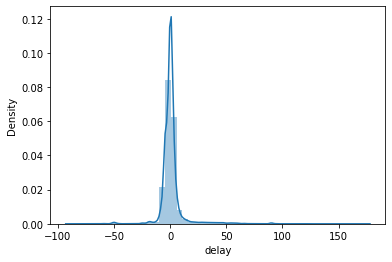

In [48]:
sns.distplot(y_train)

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

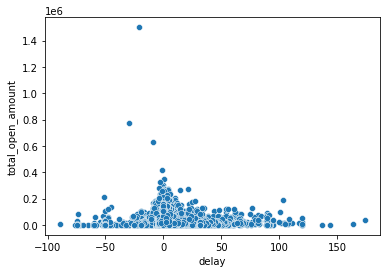

In [49]:
sns.scatterplot(data = x_train.merge(y_train,on=x_train.index),x='delay',y="total_open_amount")

# Feature Engg

In [50]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31998 entries, 38835 to 15180
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           31998 non-null  object        
 1   cust_number             31998 non-null  int32         
 2   buisness_year           31998 non-null  float64       
 3   doc_id                  31998 non-null  float64       
 4   posting_date            31998 non-null  datetime64[ns]
 5   document_create_date    31998 non-null  datetime64[ns]
 6   due_in_date             31998 non-null  datetime64[ns]
 7   total_open_amount       31998 non-null  float64       
 8   baseline_create_date    31998 non-null  datetime64[ns]
 9   invoice_id              31998 non-null  float64       
 10  name_customer_enc       31998 non-null  int32         
 11  cust_payment_terms_enc  31998 non-null  int32         
dtypes: datetime64[ns](4), float64(4), int32(3)

In [51]:
business_code_encoder = LabelEncoder()
business_code_encoder.fit(x_train['business_code'])
x_train['business_code_enc'] = business_code_encoder.transform(x_train['business_code'])
x_val['business_code_enc'] = business_code_encoder.transform(x_val['business_code'])
x_test['business_code_enc'] = business_code_encoder.transform(x_test['business_code'])
x_train.drop(['business_code'], axis =1,inplace=True)
x_val.drop(['business_code'],axis=1 , inplace=True)
x_test.drop(['business_code'],axis=1 , inplace=True)

In [52]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31998 entries, 38835 to 15180
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             31998 non-null  int32         
 1   buisness_year           31998 non-null  float64       
 2   doc_id                  31998 non-null  float64       
 3   posting_date            31998 non-null  datetime64[ns]
 4   document_create_date    31998 non-null  datetime64[ns]
 5   due_in_date             31998 non-null  datetime64[ns]
 6   total_open_amount       31998 non-null  float64       
 7   baseline_create_date    31998 non-null  datetime64[ns]
 8   invoice_id              31998 non-null  float64       
 9   name_customer_enc       31998 non-null  int32         
 10  cust_payment_terms_enc  31998 non-null  int32         
 11  business_code_enc       31998 non-null  int32         
dtypes: datetime64[ns](4), float64(4), int32(4)

In [53]:
x_train['day_of_week_posting_date'] = x_train['posting_date'].dt.weekday 
x_val['day_of_week_posting_date'] = x_val['posting_date'].dt.weekday 
x_test['day_of_week_posting_date'] = x_test['posting_date'].dt.weekday

x_train['day_of_posting_date'] = x_train['posting_date'].dt.day
x_val['day_of_posting_date'] = x_val['posting_date'].dt.day
x_test['day_of_posting_date'] = x_test['posting_date'].dt.day

x_train['month_of_posting_date'] = x_train['posting_date'].dt.month
x_val['month_of_posting_date'] = x_val['posting_date'].dt.month
x_test['month_of_posting_date'] = x_test['posting_date'].dt.month

x_train['year_of_posting_date'] = x_train['posting_date'].dt.year
x_val['year_of_posting_date'] = x_val['posting_date'].dt.year
x_test['year_of_posting_date'] = x_test['posting_date'].dt.year


In [54]:
x_train.drop(['posting_date'], axis=1,inplace=True)
x_val.drop(['posting_date'],axis=1 , inplace=True)
x_test.drop(['posting_date'],axis=1 , inplace=True)

In [55]:
x_train['day_of_week_document_due_in_date'] = x_train['due_in_date'].dt.weekday 
x_val['day_of_week_document_due_in_date'] = x_val['due_in_date'].dt.weekday 
x_test['day_of_week_document_due_in_date'] = x_test['due_in_date'].dt.weekday

x_train['day_of_document_due_in_date'] = x_train['due_in_date'].dt.day
x_val['day_of_document_due_in_date'] = x_val['due_in_date'].dt.day
x_test['day_of_document_due_in_date'] = x_test['due_in_date'].dt.day

x_train['month_of_document_due_in_date'] = x_train['due_in_date'].dt.month
x_val['month_of_document_due_in_date'] = x_val['due_in_date'].dt.month
x_test['month_of_document_due_in_date'] = x_test['due_in_date'].dt.month

x_train['year_of_document_due_in_date'] = x_train['due_in_date'].dt.year
x_val['year_of_document_due_in_date'] = x_val['due_in_date'].dt.year
x_test['year_of_document_due_in_date'] = x_test['due_in_date'].dt.year

In [56]:
x_train.drop(['due_in_date'], axis=1,inplace=True)
x_val.drop(['due_in_date'],axis=1 , inplace=True)
x_test.drop(['due_in_date'],axis=1 , inplace=True)

In [57]:
x_train['day_of_week_baseline_create_date'] = x_train['baseline_create_date'].dt.weekday 
x_val['day_of_week_baseline_create_date'] = x_val['baseline_create_date'].dt.weekday 
x_test['day_of_week_baseline_create_date'] = x_test['baseline_create_date'].dt.weekday

x_train['day_of_baseline_create_date'] = x_train['baseline_create_date'].dt.day
x_val['day_of_baseline_create_date'] = x_val['baseline_create_date'].dt.day
x_test['day_of_baseline_create_date'] = x_test['baseline_create_date'].dt.day

x_train['month_of_baseline_create_date'] = x_train['baseline_create_date'].dt.month
x_val['month_of_baseline_create_date'] = x_val['baseline_create_date'].dt.month
x_test['month_of_baseline_create_date'] = x_test['baseline_create_date'].dt.month

x_train['year_of_baseline_create_date'] = x_train['baseline_create_date'].dt.year
x_val['year_of_baseline_create_date'] = x_val['baseline_create_date'].dt.year
x_test['year_of_baseline_create_date'] = x_test['baseline_create_date'].dt.year

In [58]:
x_train.drop(['baseline_create_date'], axis=1,inplace=True)
x_val.drop(['baseline_create_date'],axis=1 , inplace=True)
x_test.drop(['baseline_create_date'],axis=1 , inplace=True)

In [59]:
x_train['day_of_week_document_create_date'] = x_train['document_create_date'].dt.weekday 
x_val['day_of_week_document_create_date'] = x_val['document_create_date'].dt.weekday 
x_test['day_of_week_document_create_date'] = x_test['document_create_date'].dt.weekday

x_train['day_of_document_create_date'] = x_train['document_create_date'].dt.day
x_val['day_of_document_create_date'] = x_val['document_create_date'].dt.day
x_test['day_of_document_create_date'] = x_test['document_create_date'].dt.day

x_train['month_of_document_create_date'] = x_train['document_create_date'].dt.month
x_val['month_of_document_create_date'] = x_val['document_create_date'].dt.month
x_test['month_of_document_create_date'] = x_test['document_create_date'].dt.month

x_train['year_of_document_create_date'] = x_train['document_create_date'].dt.year
x_val['year_of_document_create_date'] = x_val['document_create_date'].dt.year
x_test['year_of_document_create_date'] = x_test['document_create_date'].dt.year

In [60]:
x_train.drop(['document_create_date'], axis=1,inplace=True)
x_val.drop(['document_create_date'],axis=1 , inplace=True)
x_test.drop(['document_create_date'],axis=1 , inplace=True)

# Feature selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

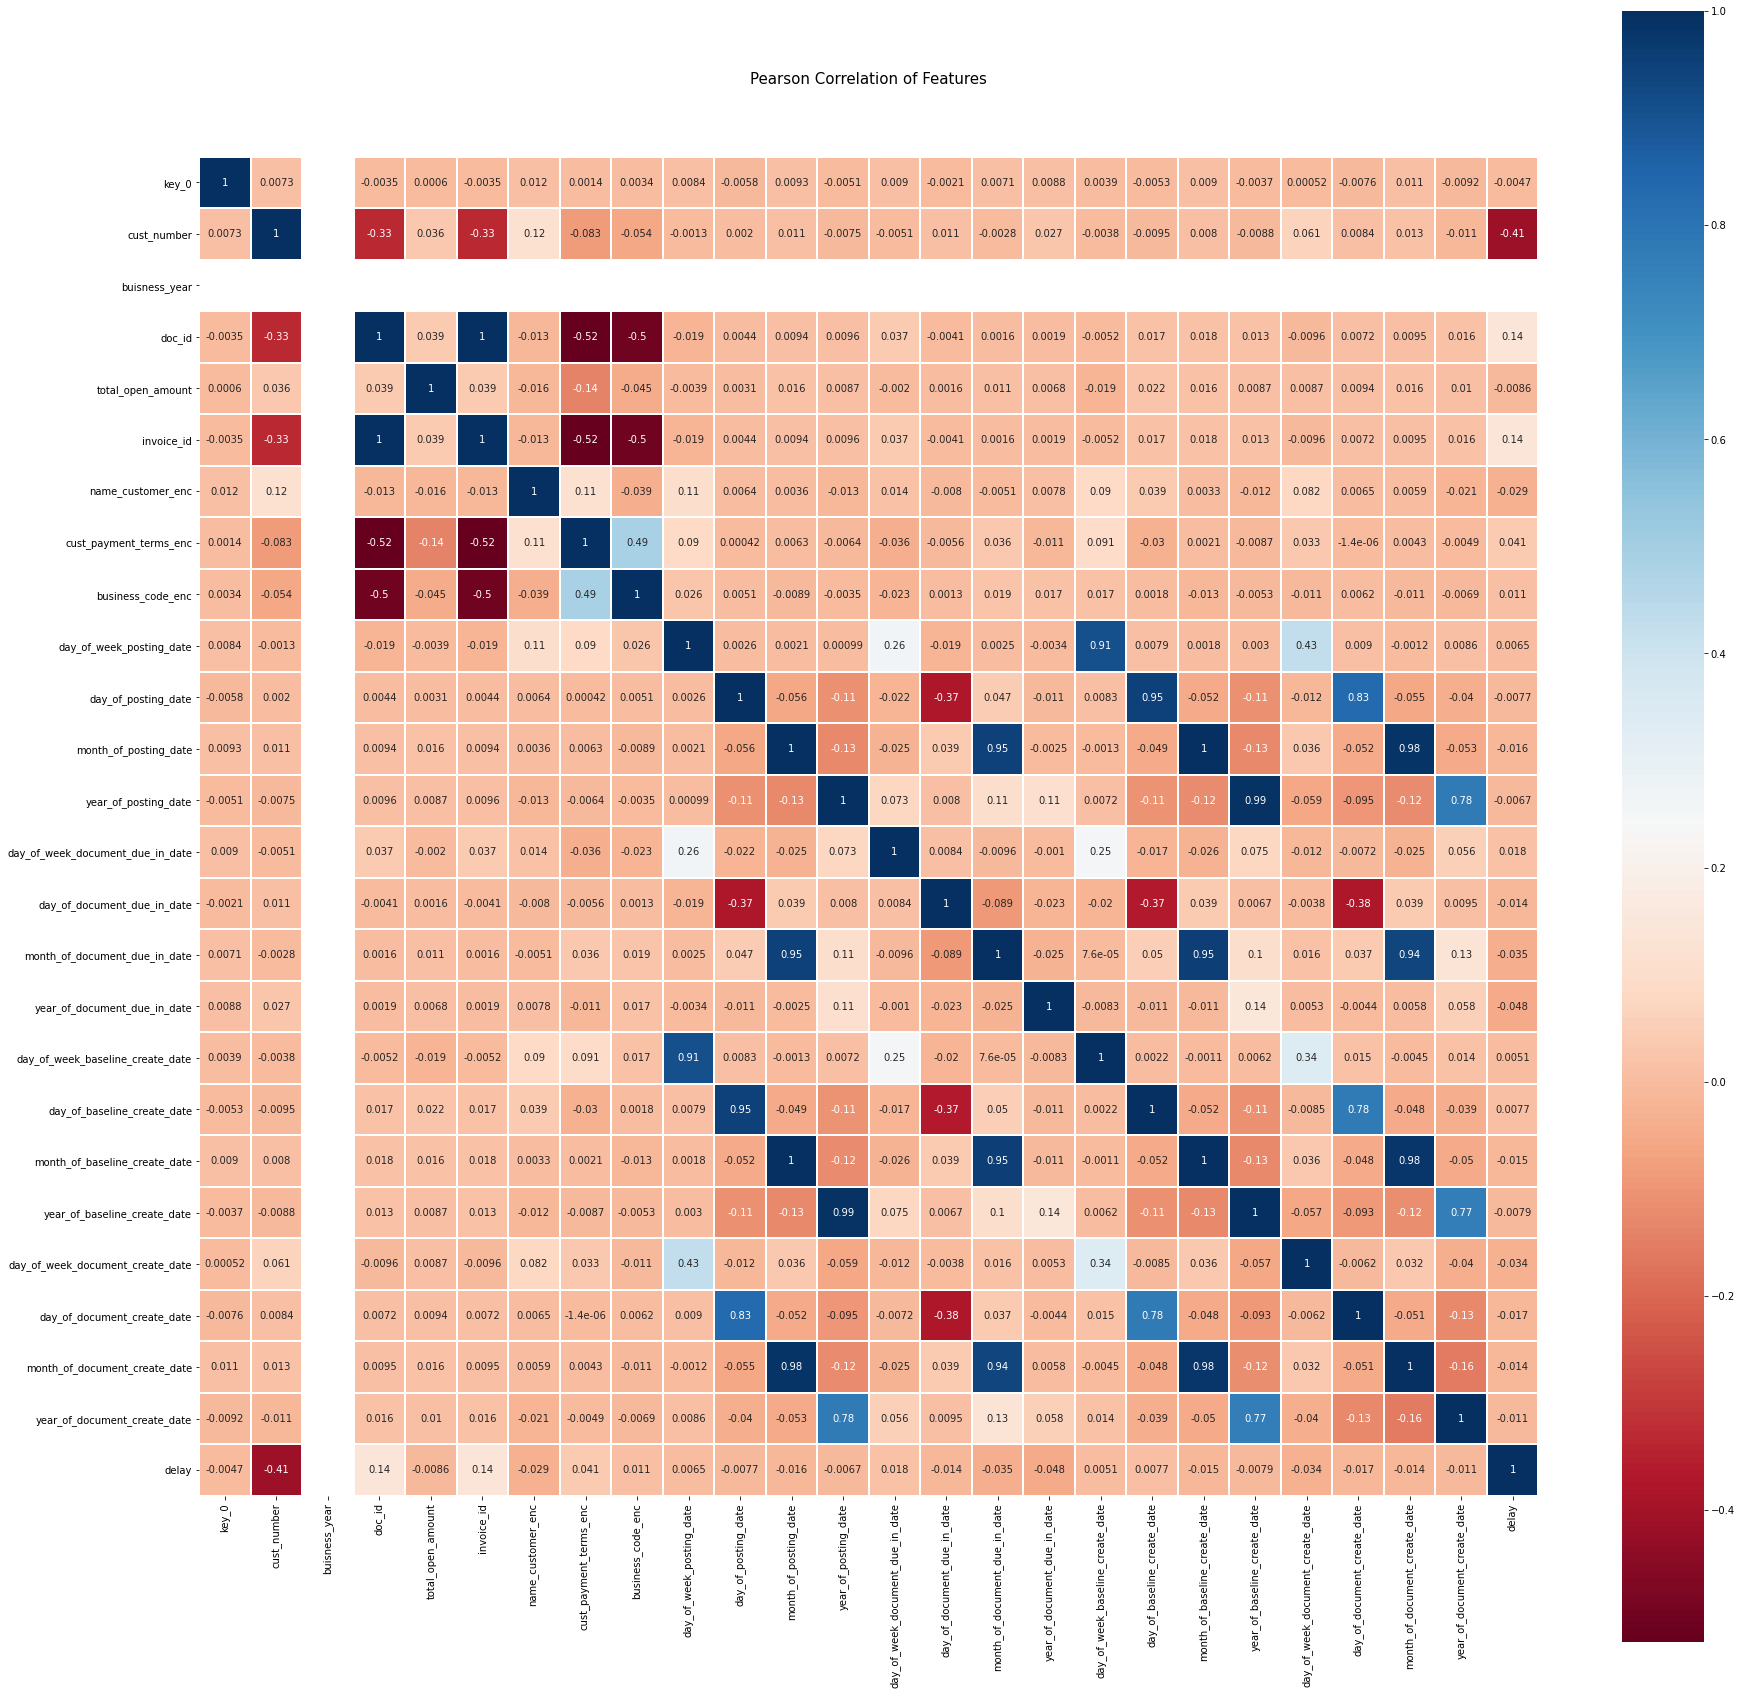

In [61]:
colormap = plt.cm.RdBu
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [62]:
x_train.drop('buisness_year',axis=1,inplace=True) # here we can see buisness_year is a constant .so, we have to drop it 
x_val.drop('buisness_year',axis=1,inplace=True)
x_test.drop('buisness_year',axis=1,inplace=True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

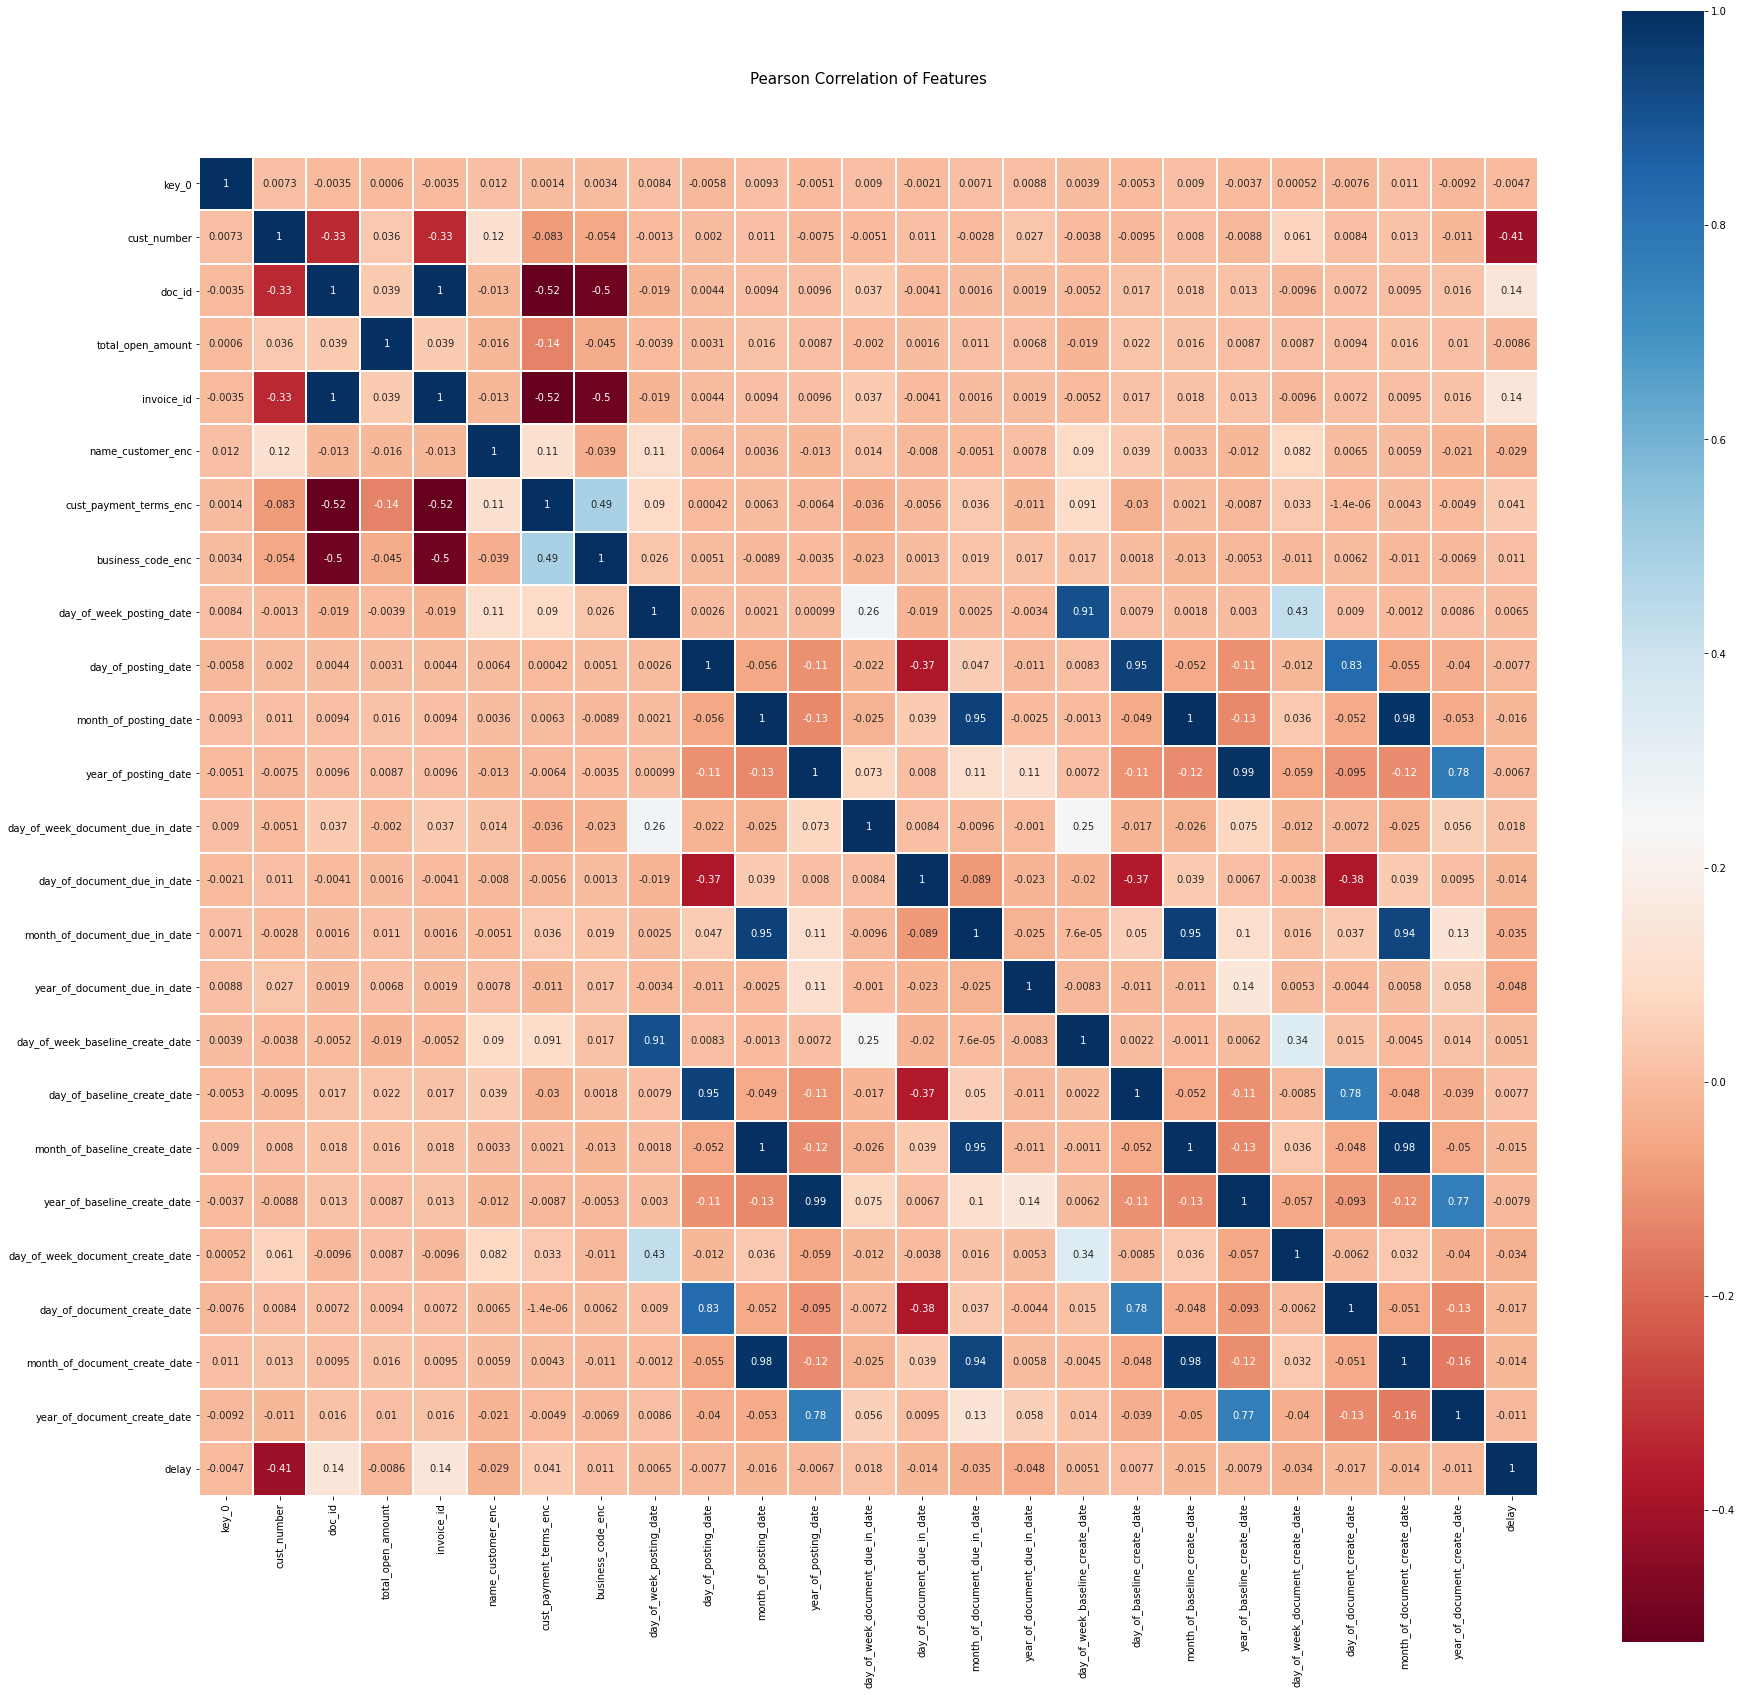

In [63]:
colormap = plt.cm.RdBu
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Modelling
## 1.Linear Model

In [64]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(x_train, y_train)

LinearRegression()

In [65]:
y_predict = base_model.predict(x_val)

In [66]:
pd.DataFrame(zip(y_val,y_predict),columns=['Predicted','Actuals'])     #comparing the predicted and actual value

,Predicted,Actuals
0,-2,0.326450
1,1,-0.632361
2,1,6.072804
3,1,-1.667299
4,-1,-0.213923
...,...,...
3995,0,-26.037331
3996,0,-30.288743
3997,-5,-25.361420
3998,-1,-26.152845


In [67]:
from sklearn.metrics import mean_squared_error
                                                    #basically mean square error give us the tolerance value
mean_squared_error(y_val, y_predict, squared=False)

15.53127311376963

## 2.Tree Modelling

In [68]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [69]:
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [70]:
y_predict2 = tree_model.predict(x_val)

In [71]:
mean_squared_error(y_val, y_predict2, squared=False) 
# hence the value of mean squared error in tree model is less than liner model

5.396542665511612

In [72]:
y_predict_test = tree_model.predict(x_test)
mean_squared_error(y_test, y_predict_test, squared=False)

7.778616635859225

In [73]:
y_predict_test

array([-2.04706659,  0.81842697,  0.81842697, ..., -2.04706659,
       34.20261438,  0.81842697])

# Null value data 

In [74]:
# In training_2 we have to do same step that we did on training_1
#preprocessing
#feature Engg
#feature selection 

In [75]:
training_2   

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,U001,0200769623,WAL-MAR,NaN,2020.0,1.930701e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,36330.27,20200325.0,NAH4,1.930701e+09,1
10,U001,0200707822,PUBLI systems,NaN,2020.0,1.930619e+09,2020-03-06,20200307,20200306,20200321.0,USD,RV,1.0,15716.28,20200306.0,NAA8,1.930619e+09,1
11,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930779e+09,2020-04-12,20200411,20200412,20200427.0,USD,RV,1.0,27036.75,20200412.0,NAH4,1.930779e+09,1
17,U001,200707822,PUBLI llc,NaN,2020.0,1.930724e+09,2020-03-31,20200331,20200331,20200415.0,USD,RV,1.0,86038.65,20200331.0,NAA8,1.930724e+09,1
19,U001,0200020431,DEC in,NaN,2020.0,1.930765e+09,2020-04-09,20200409,20200409,20200424.0,USD,RV,1.0,11108.70,20200401.0,NAM4,1.930765e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49971,U001,200936373,SUPE corp,NaN,2020.0,1.930839e+09,2020-05-01,20200429,20200501,20200516.0,USD,RV,1.0,101698.19,20200501.0,NAA8,1.930839e+09,1
49974,U001,CCU002,KRFT FDS corporation,NaN,2020.0,1.930629e+09,2020-03-11,20200309,20200311,20200415.0,USD,RV,1.0,14664.00,20200311.0,NAG2,1.930629e+09,1
49989,U001,0200707822,PUBLI associates,NaN,2020.0,1.930782e+09,2020-04-16,20200414,20200416,20200501.0,USD,RV,1.0,166120.87,20200416.0,NAA8,1.930782e+09,1
49992,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930710e+09,2020-03-28,20200327,20200328,20200412.0,USD,RV,1.0,25018.49,20200328.0,NAH4,1.930710e+09,1


In [76]:
# Preprocessing 

In [77]:
training_2.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [78]:
x_training_2=training_2.drop(['clear_date'],axis=1)
x_training_2.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,U001,0200769623,WAL-MAR,2020.0,1.930701e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,36330.27,20200325.0,NAH4,1.930701e+09,1
10,U001,0200707822,PUBLI systems,2020.0,1.930619e+09,2020-03-06,20200307,20200306,20200321.0,USD,RV,1.0,15716.28,20200306.0,NAA8,1.930619e+09,1
11,U001,0200769623,WAL-MAR corporation,2020.0,1.930779e+09,2020-04-12,20200411,20200412,20200427.0,USD,RV,1.0,27036.75,20200412.0,NAH4,1.930779e+09,1
17,U001,200707822,PUBLI llc,2020.0,1.930724e+09,2020-03-31,20200331,20200331,20200415.0,USD,RV,1.0,86038.65,20200331.0,NAA8,1.930724e+09,1
19,U001,0200020431,DEC in,2020.0,1.930765e+09,2020-04-09,20200409,20200409,20200424.0,USD,RV,1.0,11108.70,20200401.0,NAM4,1.930765e+09,1


In [79]:
x_training_2.nunique()

business_code                6
cust_number                672
name_customer             1766
buisness_year                1
doc_id                    9723
posting_date                81
document_create_date        89
document_create_date.1      81
due_in_date                126
invoice_currency             2
document type                1
posting_id                   1
total_open_amount         9035
baseline_create_date        86
cust_payment_terms          45
invoice_id                9723
isOpen                       1
dtype: int64

In [80]:
x_training_2.drop(['buisness_year','document type','posting_id','isOpen'],axis=1,inplace=True) # droping constant value

In [81]:
x_training_2.drop('document_create_date.1',axis=1,inplace=True)

In [82]:
x_training_2.dtypes

business_code            object
cust_number              object
name_customer            object
doc_id                  float64
posting_date             object
document_create_date      int64
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
invoice_id              float64
dtype: object

In [83]:
x_training_2['posting_date'] = pd.to_datetime(x_training_2['posting_date'])
x_training_2['document_create_date'] = pd.to_datetime(x_training_2['document_create_date'], format='%Y%m%d')
x_training_2['due_in_date'] = pd.to_datetime(x_training_2['due_in_date'], format='%Y%m%d')
x_training_2['baseline_create_date'] = pd.to_datetime(x_training_2['baseline_create_date'], format='%Y%m%d')


# Feature Engg

In [84]:
x_training_2.head()

,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
3,U001,0200769623,WAL-MAR,1.930701e+09,2020-03-25,2020-03-25,2020-04-09,USD,36330.27,2020-03-25,NAH4,1.930701e+09
10,U001,0200707822,PUBLI systems,1.930619e+09,2020-03-06,2020-03-07,2020-03-21,USD,15716.28,2020-03-06,NAA8,1.930619e+09
11,U001,0200769623,WAL-MAR corporation,1.930779e+09,2020-04-12,2020-04-11,2020-04-27,USD,27036.75,2020-04-12,NAH4,1.930779e+09
17,U001,200707822,PUBLI llc,1.930724e+09,2020-03-31,2020-03-31,2020-04-15,USD,86038.65,2020-03-31,NAA8,1.930724e+09
19,U001,0200020431,DEC in,1.930765e+09,2020-04-09,2020-04-09,2020-04-24,USD,11108.70,2020-04-01,NAM4,1.930765e+09


In [85]:
x_training_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49996
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         10000 non-null  object        
 1   cust_number           10000 non-null  object        
 2   name_customer         10000 non-null  object        
 3   doc_id                10000 non-null  float64       
 4   posting_date          10000 non-null  datetime64[ns]
 5   document_create_date  10000 non-null  datetime64[ns]
 6   due_in_date           10000 non-null  datetime64[ns]
 7   invoice_currency      10000 non-null  object        
 8   total_open_amount     10000 non-null  float64       
 9   baseline_create_date  10000 non-null  datetime64[ns]
 10  cust_payment_terms    10000 non-null  object        
 11  invoice_id            10000 non-null  float64       
dtypes: datetime64[ns](4), float64(3), object(5)
memory usage: 1015.6+ KB


In [86]:
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(x_training_2['business_code'])
x_training_2['business_code_enc'] = business_code_encoder.transform(x_training_2['business_code'])

In [87]:
x_training_2.drop('business_code',axis=1,inplace=True)

In [88]:
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(x_training_2['name_customer'])
x_training_2['name_customer_enc'] = name_customer_encoder.transform(x_training_2['name_customer'])

cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(x_training_2['cust_payment_terms'])
x_training_2['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(x_training_2['cust_payment_terms'])

In [89]:
x_training_2.drop(['name_customer','cust_payment_terms'],axis=1,inplace=True)

In [90]:
x_training_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49996
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             10000 non-null  object        
 1   doc_id                  10000 non-null  float64       
 2   posting_date            10000 non-null  datetime64[ns]
 3   document_create_date    10000 non-null  datetime64[ns]
 4   due_in_date             10000 non-null  datetime64[ns]
 5   invoice_currency        10000 non-null  object        
 6   total_open_amount       10000 non-null  float64       
 7   baseline_create_date    10000 non-null  datetime64[ns]
 8   invoice_id              10000 non-null  float64       
 9   business_code_enc       10000 non-null  int32         
 10  name_customer_enc       10000 non-null  int32         
 11  cust_payment_terms_enc  10000 non-null  int32         
dtypes: datetime64[ns](4), float64(3), int32(3), ob

In [91]:
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(x_training_2['cust_number'])
x_training_2['cust_number_enc'] = cust_number_encoder.transform(x_training_2['cust_number'])

In [92]:
x_training_2.drop('cust_number',axis=1,inplace=True)

In [93]:
x_training_2.nunique()

doc_id                    9723
posting_date                81
document_create_date        89
due_in_date                126
invoice_currency             2
total_open_amount         9035
baseline_create_date        86
invoice_id                9723
business_code_enc            6
name_customer_enc         1766
cust_payment_terms_enc      45
cust_number_enc            672
dtype: int64

In [94]:
x = x_training_2[x_training_2['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.79)    

for i in x.index:
    x_training_2['total_open_amount'][i] = 0.79*x[i]
    
    
x_training_2.drop(['invoice_currency'],axis=1,inplace=True)


In [95]:
x_training_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49996
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   doc_id                  10000 non-null  float64       
 1   posting_date            10000 non-null  datetime64[ns]
 2   document_create_date    10000 non-null  datetime64[ns]
 3   due_in_date             10000 non-null  datetime64[ns]
 4   total_open_amount       10000 non-null  float64       
 5   baseline_create_date    10000 non-null  datetime64[ns]
 6   invoice_id              10000 non-null  float64       
 7   business_code_enc       10000 non-null  int32         
 8   name_customer_enc       10000 non-null  int32         
 9   cust_payment_terms_enc  10000 non-null  int32         
 10  cust_number_enc         10000 non-null  int32         
dtypes: datetime64[ns](4), float64(3), int32(4)
memory usage: 1.0 MB


In [96]:
x_training_2['day_of_week_posting'] = x_training_2['posting_date'].dt.weekday 
x_training_2['day_of_posting'] = x_training_2['posting_date'].dt.day
x_training_2['month_of_posting'] = x_training_2['posting_date'].dt.month
x_training_2['year_of_posting'] = x_training_2['posting_date'].dt.year

x_training_2['day_of_week_document_create_date'] = x_training_2['document_create_date'].dt.weekday 
x_training_2['day_of_document_create_date'] = x_training_2['document_create_date'].dt.day
x_training_2['month_of_document_create_date'] = x_training_2['document_create_date'].dt.month
x_training_2['year_of_document_create_date'] = x_training_2['document_create_date'].dt.year

x_training_2['day_of_week_due_in_date'] = x_training_2['due_in_date'].dt.weekday 
x_training_2['day_of_due_in_date'] = x_training_2['due_in_date'].dt.day
x_training_2['month_of_due_in_date'] = x_training_2['due_in_date'].dt.month
x_training_2['year_of_due_in_date'] = x_training_2['due_in_date'].dt.year

x_training_2['day_of_week_baseline_create_date'] = x_training_2['baseline_create_date'].dt.weekday 
x_training_2['day_of_baseline_create_date'] = x_training_2['baseline_create_date'].dt.day
x_training_2['month_of_baseline_create_date'] = x_training_2['baseline_create_date'].dt.month
x_training_2['year_of_baseline_create_date'] = x_training_2['baseline_create_date'].dt.year

In [97]:
x_training_2.drop(['posting_date','document_create_date','due_in_date','baseline_create_date'],axis=1,inplace=True)

In [98]:
x_training_2.columns

Index(['doc_id', 'total_open_amount', 'invoice_id', 'business_code_enc',
       'name_customer_enc', 'cust_payment_terms_enc', 'cust_number_enc',
       'day_of_week_posting', 'day_of_posting', 'month_of_posting',
       'year_of_posting', 'day_of_week_document_create_date',
       'day_of_document_create_date', 'month_of_document_create_date',
       'year_of_document_create_date', 'day_of_week_due_in_date',
       'day_of_due_in_date', 'month_of_due_in_date', 'year_of_due_in_date',
       'day_of_week_baseline_create_date', 'day_of_baseline_create_date',
       'month_of_baseline_create_date', 'year_of_baseline_create_date'],
      dtype='object')

In [99]:
x_train.columns

Index(['cust_number', 'doc_id', 'total_open_amount', 'invoice_id',
       'name_customer_enc', 'cust_payment_terms_enc', 'business_code_enc',
       'day_of_week_posting_date', 'day_of_posting_date',
       'month_of_posting_date', 'year_of_posting_date',
       'day_of_week_document_due_in_date', 'day_of_document_due_in_date',
       'month_of_document_due_in_date', 'year_of_document_due_in_date',
       'day_of_week_baseline_create_date', 'day_of_baseline_create_date',
       'month_of_baseline_create_date', 'year_of_baseline_create_date',
       'day_of_week_document_create_date', 'day_of_document_create_date',
       'month_of_document_create_date', 'year_of_document_create_date'],
      dtype='object')

In [100]:
x_train.drop('cust_number',axis=1,inplace=True)

# Final Step
#### PREDICTION

In [101]:
final_result = tree_model.predict(x_training_2) # using tree model to predict the Final result

In [102]:
final_result = pd.Series(final_result,name='Delay')  # predicting the Delay in final result

In [103]:
training_2.reset_index(drop=True,inplace=True)     # resting the index to merge the data 

In [104]:
Final = training_2.merge(final_result , on = x_training_2.index )    
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,3,U001,0200769623,WAL-MAR,NaN,2020.0,1.930701e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,36330.27,20200325.0,NAH4,1.930701e+09,1,0.818427
1,10,U001,0200707822,PUBLI systems,NaN,2020.0,1.930619e+09,2020-03-06,20200307,20200306,20200321.0,USD,RV,1.0,15716.28,20200306.0,NAA8,1.930619e+09,1,0.818427
2,11,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930779e+09,2020-04-12,20200411,20200412,20200427.0,USD,RV,1.0,27036.75,20200412.0,NAH4,1.930779e+09,1,0.818427
3,17,U001,200707822,PUBLI llc,NaN,2020.0,1.930724e+09,2020-03-31,20200331,20200331,20200415.0,USD,RV,1.0,86038.65,20200331.0,NAA8,1.930724e+09,1,0.818427
4,19,U001,0200020431,DEC in,NaN,2020.0,1.930765e+09,2020-04-09,20200409,20200409,20200424.0,USD,RV,1.0,11108.70,20200401.0,NAM4,1.930765e+09,1,0.818427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49971,U001,200936373,SUPE corp,NaN,2020.0,1.930839e+09,2020-05-01,20200429,20200501,20200516.0,USD,RV,1.0,101698.19,20200501.0,NAA8,1.930839e+09,1,0.818427
9996,49974,U001,CCU002,KRFT FDS corporation,NaN,2020.0,1.930629e+09,2020-03-11,20200309,20200311,20200415.0,USD,RV,1.0,14664.00,20200311.0,NAG2,1.930629e+09,1,0.818427
9997,49989,U001,0200707822,PUBLI associates,NaN,2020.0,1.930782e+09,2020-04-16,20200414,20200416,20200501.0,USD,RV,1.0,166120.87,20200416.0,NAA8,1.930782e+09,1,0.818427
9998,49992,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930710e+09,2020-03-28,20200327,20200328,20200412.0,USD,RV,1.0,25018.49,20200328.0,NAH4,1.930710e+09,1,0.818427


In [105]:
Final.max()

key_0                            49996
business_code                     U013
cust_number                     CCU013
name_customer              ZIYAD  corp
clear_date                        None
buisness_year                   2020.0
doc_id                    2960633981.0
posting_date                2020-05-22
document_create_date          20200522
document_create_date.1        20200522
due_in_date                 20200711.0
invoice_currency                   USD
document type                       RV
posting_id                         1.0
total_open_amount            333377.81
baseline_create_date        20200522.0
cust_payment_terms                NAX2
invoice_id                2960633981.0
isOpen                               1
Delay                        38.454545
dtype: object

In [106]:
Final.nunique()       # The unique value of Delay is 6

key_0                     10000
business_code                 6
cust_number                 672
name_customer              1766
clear_date                    0
buisness_year                 1
doc_id                     9723
posting_date                 81
document_create_date         89
document_create_date.1       81
due_in_date                 126
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount          9035
baseline_create_date         86
cust_payment_terms           45
invoice_id                 9723
isOpen                        1
Delay                         6
dtype: int64

In [107]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   key_0                   10000 non-null  int64  
 1   business_code           10000 non-null  object 
 2   cust_number             10000 non-null  object 
 3   name_customer           10000 non-null  object 
 4   clear_date              0 non-null      object 
 5   buisness_year           10000 non-null  float64
 6   doc_id                  10000 non-null  float64
 7   posting_date            10000 non-null  object 
 8   document_create_date    10000 non-null  int64  
 9   document_create_date.1  10000 non-null  int64  
 10  due_in_date             10000 non-null  float64
 11  invoice_currency        10000 non-null  object 
 12  document type           10000 non-null  object 
 13  posting_id              10000 non-null  float64
 14  total_open_amount       10000 non-null 

In [108]:
temp = Final['Delay'].apply(np.ceil).apply(lambda x:pd.Timedelta(x,unit='D'))

In [109]:
Final.head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,3,U001,0200769623,WAL-MAR,NaN,2020.0,1.930701e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,36330.27,20200325.0,NAH4,1.930701e+09,1,0.818427
1,10,U001,0200707822,PUBLI systems,NaN,2020.0,1.930619e+09,2020-03-06,20200307,20200306,20200321.0,USD,RV,1.0,15716.28,20200306.0,NAA8,1.930619e+09,1,0.818427
2,11,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930779e+09,2020-04-12,20200411,20200412,20200427.0,USD,RV,1.0,27036.75,20200412.0,NAH4,1.930779e+09,1,0.818427
3,17,U001,200707822,PUBLI llc,NaN,2020.0,1.930724e+09,2020-03-31,20200331,20200331,20200415.0,USD,RV,1.0,86038.65,20200331.0,NAA8,1.930724e+09,1,0.818427
4,19,U001,0200020431,DEC in,NaN,2020.0,1.930765e+09,2020-04-09,20200409,20200409,20200424.0,USD,RV,1.0,11108.70,20200401.0,NAM4,1.930765e+09,1,0.818427


In [110]:
Final['due_in_date'] = pd.to_datetime(Final['due_in_date'], format='%Y%m%d') #converting due_in_date into date time form

In [111]:
Final['clear_date'] =Final['due_in_date']+temp  # clear_date = due_in_date + Delay

In [112]:
Final     # Final data 

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,3,U001,0200769623,WAL-MAR,2020-04-10,2020.0,1.930701e+09,2020-03-25,20200325,20200325,2020-04-09,USD,RV,1.0,36330.27,20200325.0,NAH4,1.930701e+09,1,0.818427
1,10,U001,0200707822,PUBLI systems,2020-03-22,2020.0,1.930619e+09,2020-03-06,20200307,20200306,2020-03-21,USD,RV,1.0,15716.28,20200306.0,NAA8,1.930619e+09,1,0.818427
2,11,U001,0200769623,WAL-MAR corporation,2020-04-28,2020.0,1.930779e+09,2020-04-12,20200411,20200412,2020-04-27,USD,RV,1.0,27036.75,20200412.0,NAH4,1.930779e+09,1,0.818427
3,17,U001,200707822,PUBLI llc,2020-04-16,2020.0,1.930724e+09,2020-03-31,20200331,20200331,2020-04-15,USD,RV,1.0,86038.65,20200331.0,NAA8,1.930724e+09,1,0.818427
4,19,U001,0200020431,DEC in,2020-04-25,2020.0,1.930765e+09,2020-04-09,20200409,20200409,2020-04-24,USD,RV,1.0,11108.70,20200401.0,NAM4,1.930765e+09,1,0.818427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49971,U001,200936373,SUPE corp,2020-05-17,2020.0,1.930839e+09,2020-05-01,20200429,20200501,2020-05-16,USD,RV,1.0,101698.19,20200501.0,NAA8,1.930839e+09,1,0.818427
9996,49974,U001,CCU002,KRFT FDS corporation,2020-04-16,2020.0,1.930629e+09,2020-03-11,20200309,20200311,2020-04-15,USD,RV,1.0,14664.00,20200311.0,NAG2,1.930629e+09,1,0.818427
9997,49989,U001,0200707822,PUBLI associates,2020-05-02,2020.0,1.930782e+09,2020-04-16,20200414,20200416,2020-05-01,USD,RV,1.0,166120.87,20200416.0,NAA8,1.930782e+09,1,0.818427
9998,49992,U001,0200769623,WAL-MAR us,2020-04-13,2020.0,1.930710e+09,2020-03-28,20200327,20200328,2020-04-12,USD,RV,1.0,25018.49,20200328.0,NAH4,1.930710e+09,1,0.818427


# Bucket List

In [113]:
bucket = []
for time in Final['Delay']:                     # making a bucket list for final database
    nearest_multimple=(15 * round(time / 15))
    if time < 0 or nearest_multimple == 0:
        bucket += '0-15',

    elif time <= nearest_multimple:
        bucket += f'{nearest_multimple-15}-{nearest_multimple}',
    
    else:
        bucket += f'{nearest_multimple+1}-{nearest_multimple+15}',

In [114]:
Final['Time_Bucket']=bucket        # adding Time_Bucket into final

In [115]:
Final.nunique()  

key_0                     10000
business_code                 6
cust_number                 672
name_customer              1766
clear_date                  130
buisness_year                 1
doc_id                     9723
posting_date                 81
document_create_date         89
document_create_date.1       81
due_in_date                 126
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount          9035
baseline_create_date         86
cust_payment_terms           45
invoice_id                 9723
isOpen                        1
Delay                         6
Time_Bucket                   2
dtype: int64

In [116]:
Final     # final database 

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,...,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay,Time_Bucket
0,3,U001,0200769623,WAL-MAR,2020-04-10,2020.0,1.930701e+09,2020-03-25,20200325,20200325,...,USD,RV,1.0,36330.27,20200325.0,NAH4,1.930701e+09,1,0.818427,0-15
1,10,U001,0200707822,PUBLI systems,2020-03-22,2020.0,1.930619e+09,2020-03-06,20200307,20200306,...,USD,RV,1.0,15716.28,20200306.0,NAA8,1.930619e+09,1,0.818427,0-15
2,11,U001,0200769623,WAL-MAR corporation,2020-04-28,2020.0,1.930779e+09,2020-04-12,20200411,20200412,...,USD,RV,1.0,27036.75,20200412.0,NAH4,1.930779e+09,1,0.818427,0-15
3,17,U001,200707822,PUBLI llc,2020-04-16,2020.0,1.930724e+09,2020-03-31,20200331,20200331,...,USD,RV,1.0,86038.65,20200331.0,NAA8,1.930724e+09,1,0.818427,0-15
4,19,U001,0200020431,DEC in,2020-04-25,2020.0,1.930765e+09,2020-04-09,20200409,20200409,...,USD,RV,1.0,11108.70,20200401.0,NAM4,1.930765e+09,1,0.818427,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49971,U001,200936373,SUPE corp,2020-05-17,2020.0,1.930839e+09,2020-05-01,20200429,20200501,...,USD,RV,1.0,101698.19,20200501.0,NAA8,1.930839e+09,1,0.818427,0-15
9996,49974,U001,CCU002,KRFT FDS corporation,2020-04-16,2020.0,1.930629e+09,2020-03-11,20200309,20200311,...,USD,RV,1.0,14664.00,20200311.0,NAG2,1.930629e+09,1,0.818427,0-15
9997,49989,U001,0200707822,PUBLI associates,2020-05-02,2020.0,1.930782e+09,2020-04-16,20200414,20200416,...,USD,RV,1.0,166120.87,20200416.0,NAA8,1.930782e+09,1,0.818427,0-15
9998,49992,U001,0200769623,WAL-MAR us,2020-04-13,2020.0,1.930710e+09,2020-03-28,20200327,20200328,...,USD,RV,1.0,25018.49,20200328.0,NAH4,1.930710e+09,1,0.818427,0-15
